# Loss curves
## Comparison of different trainings via train & val loss

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep


plt.style.use(hep.cms.style.ROOT)

In [ ]:
'''
#Run3 setup:
model_names = ['nominal_with_etarel_phirel', 'adversarial_with_etarel_phirel']
'''

In [ ]:
model_names = ['nominal', 'adversarial_eps0p01', 'adversarial_eps0p005', 'adversarial_eps0p005_bsize100k']

In [ ]:
model_names = ['testADV3']

In [2]:
model_names = ['testADVNGM']

In [ ]:
models_str = model_names[0] + '_' + model_names[1] + '_' + model_names[2] + '_' + model_names[3]

In [3]:
models_str = model_names[0]

In [ ]:
tagger = 'DF_Run2' # 'DF'

In [4]:
tagger = 'ParT' # 'DF'

In [ ]:
dirz = [f'/eos/user/a/anstein/DeepJet/Train_{tagger}/{model_name}/' \
        for model_name in model_names]

In [5]:
dirz = [f'/eos/user/a/anstein/{tagger}/{model_name}/' \
        for model_name in model_names]

In [6]:
dirz

['/eos/user/a/anstein/ParT/testADVNGM/']

In [ ]:
colorcode = ['darkblue', 'royalblue', 'saddlebrown', 'orange', 'forestgreen', 'limegreen', 'purple', 'magenta']

In [7]:
colorcode = ['darkblue', 'royalblue']

In [ ]:
paths = {
    'nominal' : dirz[0] + f'loss_trainval.npy',
    'adversarialA' : dirz[1] + f'loss_trainval.npy',
    'adversarialB' : dirz[2] + f'loss_trainval.npy',
    'adversarialC' : dirz[3] + f'loss_trainval.npy'
    }

In [ ]:
paths = {
    'Nom x 10 + NGM x 5 + NGM & FL x 5' : dirz[0] + f'loss_trainval.npy'
    }

In [8]:
paths = {
    'NGM' : dirz[0] + f'loss_trainval.npy'
    }

In [ ]:
leg_text = {
    'nominal' : 'nominal, bsize=4000',
    'adversarialA' : r'adversarial ($\epsilon=0.01$, bsize=4000)',
    'adversarialB' : r'adversarial ($\epsilon=0.005$, bsize=4000)',
    'adversarialC' : r'adversarial ($\epsilon=0.005$, bsize=100000)'
    }

In [ ]:
leg_text = {
    'Nom x 10 + NGM x 5 + NGM & FL x 5' : 'Nom x 10 + NGM x 5 + NGM & FL x 5, bsize=512',
    }

In [9]:
leg_text = {
    'NGM' : 'NGM',
    }

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


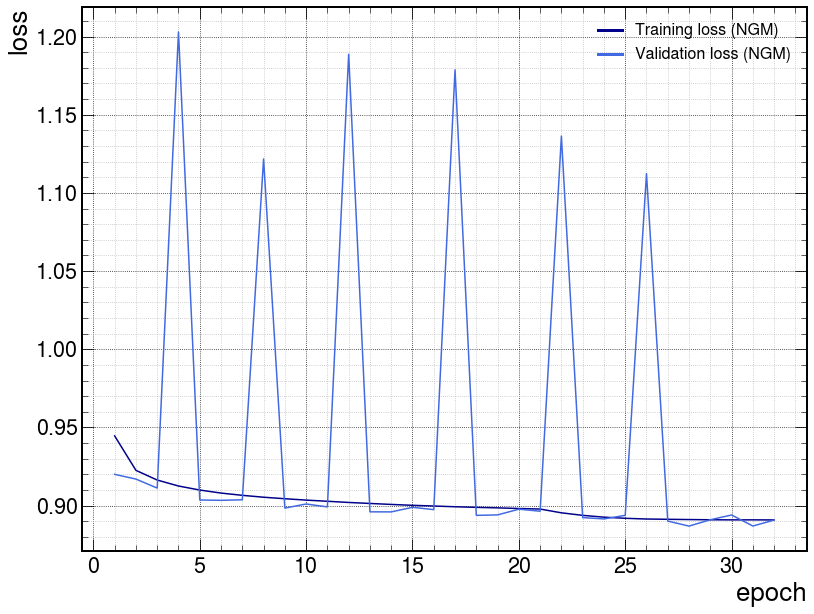

In [10]:
plt.figure(1,figsize=[13,10])
plt.grid(which='minor', alpha=0.85)
plt.grid(which='major', alpha=0.95, color='black')
for p,key in enumerate(paths):
    
    train_val_loss = np.load(paths[key])
    #print(train_val_loss)
    n_epochs = len(train_val_loss[0])
    
    epoch_axis = np.arange(1,n_epochs+1)
    # just due to wrong storage:
    #train_val_loss[1][:15] = np.array(['0.923427',
#'0.910362',
#'0.906979',
#'1.069206',
#'0.903281',
#'0.908978',
#'0.895888',
#'0.900129',
#'0.896319',
#'0.896194',
#                                 '0.917360','0.921902','0.915681','0.977406','0.914193'])
    
    plt.plot(epoch_axis, train_val_loss[0], color=colorcode[p*2], label=f'Training loss ({leg_text[key]})')
    plt.plot(epoch_axis, train_val_loss[1], color=colorcode[p*2+1], label=f'Validation loss ({leg_text[key]})')
plt.xlabel('epoch')
plt.ylabel('loss')
leg = plt.legend(fontsize=16)
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)
plt.savefig('train_val_loss_' + tagger + '_' + models_str + '.pdf', bbox_inches='tight')